# **Feature Engineering Part - 1 (Basic)**

* **freq_qid1** = Frequency of qid1's #ie, number of times question1 occur
* **freq_qid2** = Frequency of qid2's
* **q1len** = Length of q1
* **q2len** = Length of q2
* **q1_n_words** = Number of words in Question 1
* **q2_n_words** = Number of words in Question 2
* **word_Common** = (Number of common unique words in Question 1 and Question 2)
* **word_Total** =(Total num of words in Question 1 + Total num of words in Question 2)
* **word_share** = (word_common)/(word_Total)
* **freq_q1+freq_q2** = sum total of frequency of qid1 and qid2
* **freq_q1-freq_q2** = absolute difference of frequency of qid1 and qid2

In [ ]:
os.chdir('/content/drive/MyDrive/Personal_Project/Feature_Engineering/Basic_Preprocess_File')

In [ ]:
def common_wrd(row):
    x = set(row['question1'].lower().strip().split(" ")) 
    y = set(row['question2'].lower().strip().split(" "))
    return 1.0 * len(x & y)


def total(row):
    set1 = set(row['question1'].lower().strip().split(" "))
    set2 = set(row['question2'].lower().strip().split(" "))
    return 1.0 * (len(set1) + len(set2))

def word_share(row):
    x = row['word_common']/row['word_total']
    return  x

############################################
train_data['freq_qid1'] = train_data['qid1'].apply(lambda x: cnt[x])
train_data['freq_qid2'] = train_data['qid2'].apply(lambda x: cnt[x])    
train_data['q1len'] = train_data['question1'].apply(lambda x: len(x))
train_data['q2len'] = train_data['question2'].apply(lambda x: len(x))
train_data['q1_n_words'] = train_data['question1'].apply(lambda x: len(x.split(" ")))
train_data['q2_n_words'] = train_data['question2'].apply(lambda x: len(x.split(" ")))
train_data['word_common'] = train_data.apply(common_wrd,axis=1)
train_data['word_total'] = train_data.apply(total,axis=1)
train_data['word_share'] = train_data.apply(word_share,axis=1)
train_data['freq_q1+q2'] = train_data['freq_qid1']+train_data['freq_qid2']
train_data['freq_q1-q2'] = abs(train_data['freq_qid1']-train_data['freq_qid2'])
train_data.to_csv("Preprocessing_Part_1.csv", index=False)

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/Personal_Project/Feature_Engineering/Basic_Preprocess_File/Preprocessing_Part_1.csv')
train_data.sample(3)

,id,qid1,qid2,question1,question2,is_duplicate,q1len,q2len,q1_n_words,q2_n_words,freq_qid1,freq_qid2,word_common,word_total,word_share,freq_q1+q2,freq_q1-q2
178218,178219,273778,273779,Could I buy the Verizon version of the Google ...,How can a Quora answer be seen if it’s the 100...,0,122,101,26,20,1,1,2.0,37.0,0.054054,2,0
80871,80871,137411,137412,How I study for upsc exam?,What books should I study for upsc exam?,0,26,40,6,8,1,1,5.0,14.0,0.357143,2,0
57449,57449,100952,100953,"How long did it take for you to get 9,000 foll...","How long did it take for you to get 1,000 foll...",0,74,74,17,17,3,2,13.0,28.0,0.464286,5,1


In [ ]:
print ("Minimum length of the questions in question1 : " , min(train_data['q1_n_words']))

print ("Minimum length of the questions in question2 : " , min(train_data['q2_n_words']))

print ("Number of Questions with minimum length [question1] :", train_data[train_data['q1_n_words']== 1].shape[0])
print ("Number of Questions with minimum length [question2] :", train_data[train_data['q2_n_words']== 1].shape[0])

Minimum length of the questions in question1 :  1
Minimum length of the questions in question2 :  1
Number of Questions with minimum length [question1] : 66
Number of Questions with minimum length [question2] : 22


In [ ]:
train_data[train_data['q1_n_words']== 1].head(3)

,id,qid1,qid2,question1,question2,is_duplicate,q1len,q2len,q1_n_words,q2_n_words,freq_qid1,freq_qid2,word_common,word_total,word_share,freq_q1+q2,freq_q1-q2
3306,3306,6553,6554,.,Why is Cornell's endowment the lowest in the I...,0,1,56,1,10,1,1,0.0,10.0,0.0,2,0
13016,13016,25026,25027,?,Why should one not work at Google?,0,1,34,1,7,2,2,0.0,8.0,0.0,4,0
17682,17682,33561,33562,deleted,Which website will be suitable for downloading...,0,7,67,1,10,7,1,0.0,11.0,0.0,8,6


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


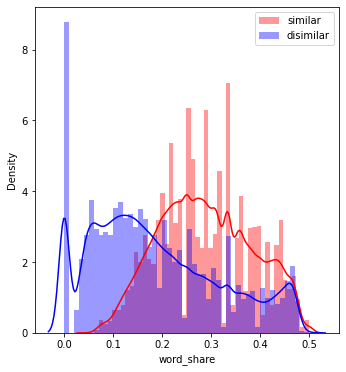

In [ ]:
plt.figure(figsize=(12,6))
#plt.subplot(2,1)
#sns.violinplot(x='is_duplicate',y='word_share',train_data=train_data)
plt.subplot(1,2,2)
sns.distplot(train_data[train_data['is_duplicate'] == 1]['word_share'],color='red',label='similar')
sns.distplot(train_data[train_data['is_duplicate'] == 0]['word_share'],color='blue',label='disimilar')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


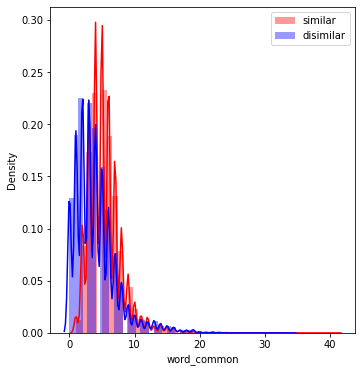

In [ ]:
plt.figure(figsize=(12,6))
#plt.subplot(1,2,1)
#sns.violinplot(x='is_duplicate',y='word_common',train_data=train_data)
plt.subplot(1,2,2)
sns.distplot(train_data[train_data['is_duplicate'] == 1]['word_common'],color='red',label='similar')
sns.distplot(train_data[train_data['is_duplicate'] == 0]['word_common'],color='blue',label='disimilar')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


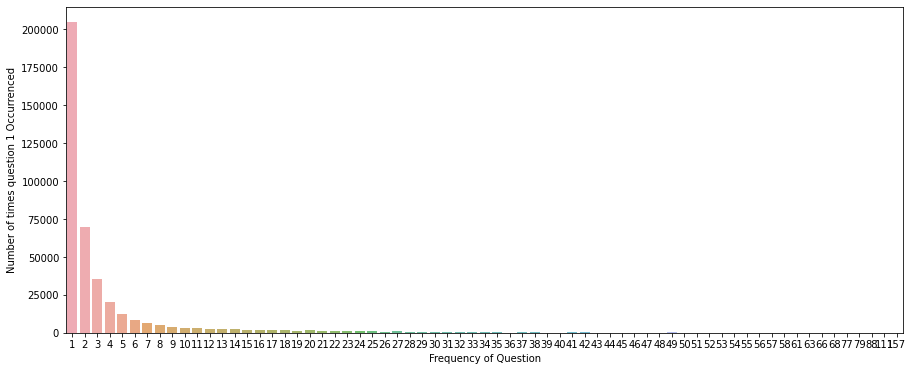

In [ ]:
# Frequency of Question 1
plt.figure(figsize=(15,6))
my_count = train_data['freq_qid1'].value_counts()
sns.barplot(my_count.index, my_count.values, alpha=0.8)
plt.ylabel('Number of times question 1 Occurrenced', fontsize=10)
plt.xlabel('Frequency of Question', fontsize=10)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


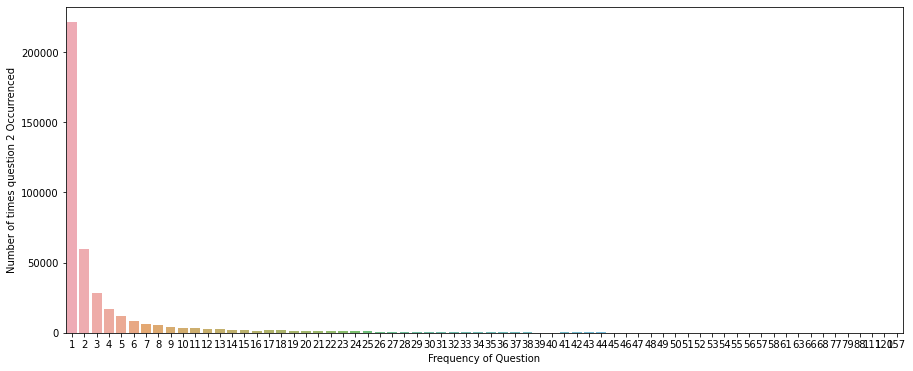

In [ ]:
# Frequency of Question 2
plt.figure(figsize=(15,6))
my_count = train_data['freq_qid2'].value_counts()
sns.barplot(my_count.index, my_count.values, alpha=0.8)
plt.ylabel('Number of times question 2 Occurrenced', fontsize=10)
plt.xlabel('Frequency of Question', fontsize=10)
plt.show()